# PW3

In [ ]:
import cv2

In [ ]:
# Read these images:
#dog_backpack.png
#watermark_no_copy.png
img1 = cv2.imread('dog_backpack.png')
img2 = cv2.imread('watermark_no_copy.png')

In [ ]:
# verify the shape of img1
img1.shape

(1401, 934, 3)

In [ ]:
# verify the shape of img2
img2.shape

(1280, 1277, 3)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

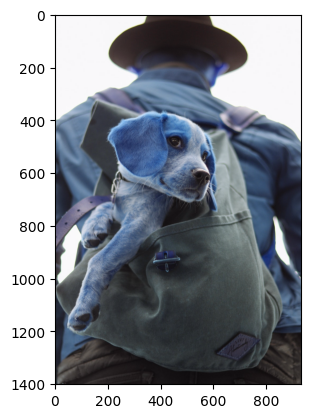

In [ ]:
# plot img1
plt.imshow(img1)

Whoops! Let's remember to fix the RGB!

In [ ]:
# fix the color distribition
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

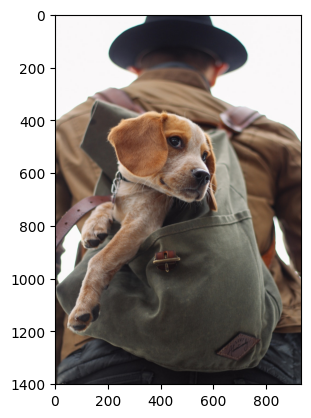

In [ ]:
# plot img1 again
plt.imshow(img1)

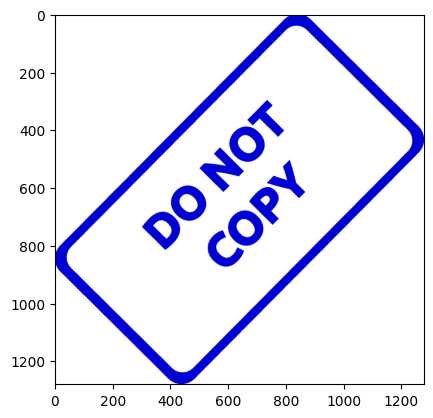

In [ ]:
# plot img2
plt.imshow(img2)

### Resizing the Images

In [ ]:
# resize img1 as (1200,1200)
img1 = cv2.resize(img1, (1200,1200))
# resize img2 as (1200,1200)
img2 = cv2.resize(img2, (1200,1200))

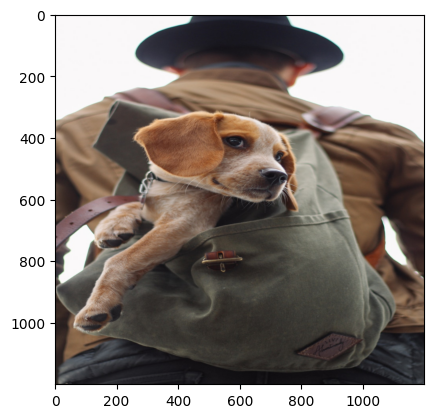

In [ ]:
# plot img1
plt.imshow(img1)

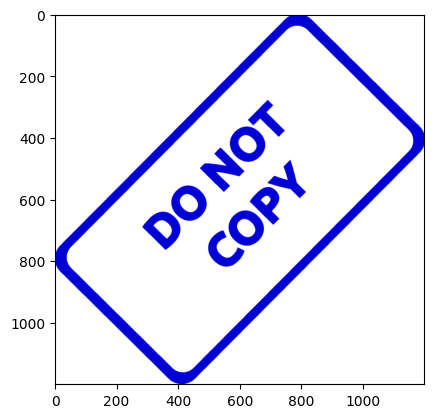

In [ ]:
# plot img2
plt.imshow(img2)

### Blending the Image

We will blend the values together with the formula:

$$  img1 * \alpha  + img2 * \beta  + \gamma $$

In [ ]:
# img1: shape
img1.shape

(1200, 1200, 3)

In [ ]:
# img2: shape
img2.shape

(1200, 1200, 3)

In [ ]:
# Blend img1 and img2 with: alpha=0.7, beta=0.3, gamma=0
# Define the blend ratio (alpha and beta should sum to 1)
alpha = 0.7
beta = 0.3
gamma = 0

# Blend the images
blended_image = cv2.addWeighted(img1, alpha, img2, beta, gamma)

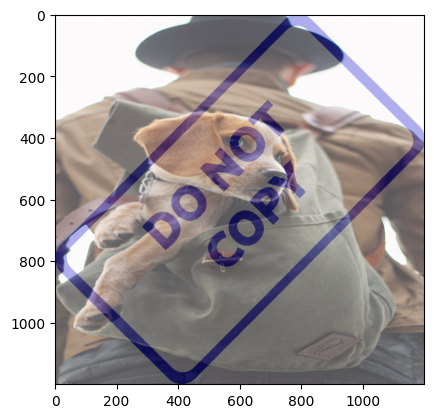

In [ ]:
# plot blended image
plt.imshow(blended_image)

-----

## Overlaying Images of Different Sizes

We can use this quick trick to quickly overlap different sized images, by simply reassigning the larger image's values to match the smaller image.

In [ ]:
# Load two images
img1= cv2.imread('dog_backpack.png')
img2= cv2.imread('watermark_no_copy.png')
#img1: dog_backpack.png
#img2: watermark_no_copy.png
#resize img2 (600,600)
img2=cv2.resize(img2,(600,600))

#fix colors distribution of img1
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
#fix colors distribution of img2
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

large_img = img1
small_img = img2

In [ ]:
x_offset=0
y_offset=0

In [ ]:
#large_img: combine large_img and small_img
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

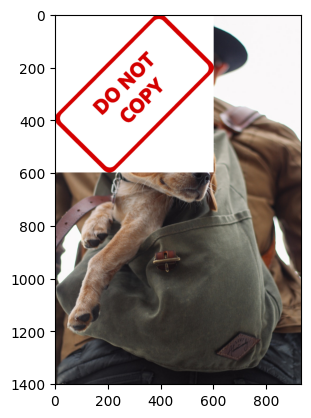

In [ ]:
plt.imshow(large_img)

________
_______

## Blending Images of Different Sizes

### Imports

In [ ]:
import numpy as np
import cv2

### Importing the images again and resizing

In [ ]:
# Load two images
img1 = cv2.imread('dog_backpack.png')
img2 = cv2.imread('watermark_no_copy.png')
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

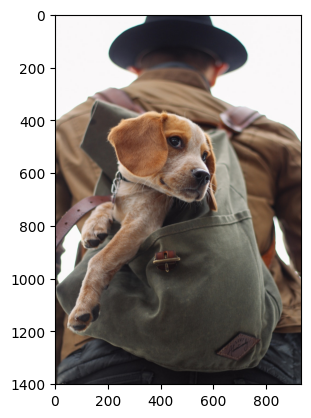

In [ ]:
#plot img1
plt.imshow(img1)

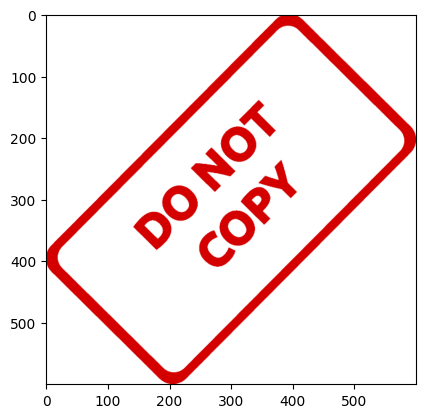

In [ ]:
#plot img2
plt.imshow(img2)

### Create a Region of Interest (ROI)

In [ ]:
#img1 shape
img1.shape

(1401, 934, 3)

In [ ]:
x_offset=934-600
y_offset=1401-600

In [ ]:
# Creating an ROI of the same size of the foreground image (smaller image that will go on top)
rows,cols,channels = img2.shape
# roi = img1[0:rows, 0:cols ] # TOP LEFT CORNER
roi = img1[y_offset:y_offset + rows, x_offset:x_offset + cols] # BOTTOM RIGHT CORNER

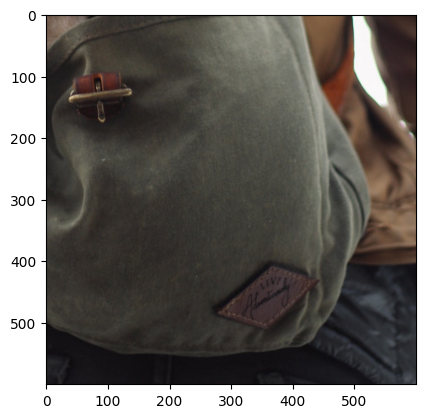

In [ ]:
plt.imshow(roi)

In [ ]:
# roi shape
roi.shape

(600, 600, 3)

### Creating a Mask

In [ ]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
mask=img2gray

In [ ]:
#img2gray shape
img2gray.shape

(600, 600)

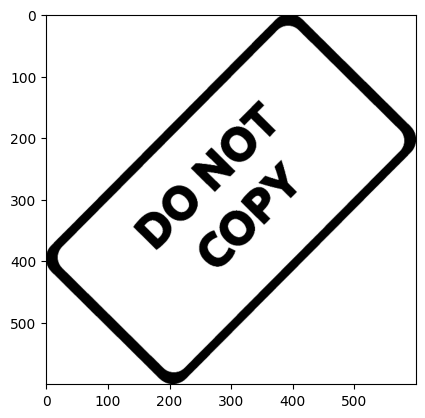

In [ ]:
# plot img2gray (cmap='gray')
plt.imshow(img2gray,cmap='gray')

In [ ]:
# use bitwise_not function to invert img2gray image
mask_inv = cv2.bitwise_not(img2gray)

In [ ]:
# mask_inv shape
mask_inv.shape

(600, 600)

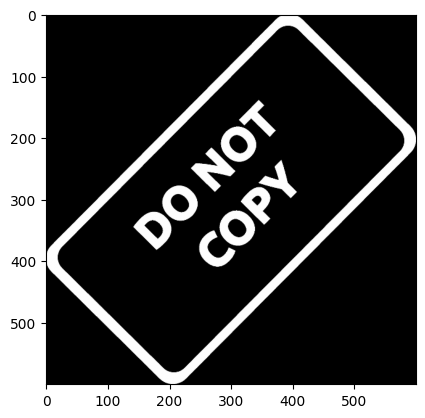

In [ ]:
# plot mask_inv, cmap='gray'
plt.imshow(mask_inv,cmap='gray')

## Convert Mask to have 3 channels

In [ ]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [ ]:
#use bitwise_or image to add 2 layers on mask_inv image
bk=cv2.bitwise_or(white_background,white_background,mask=mask_inv)

In [ ]:
bk.shape

(600, 600, 3)

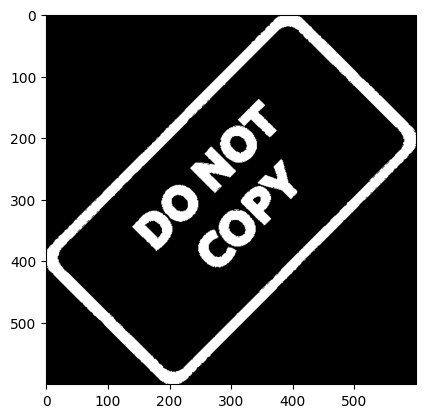

In [ ]:
# plot  bk
plt.imshow(bk)

### Grab Original FG image and place on top of Mask

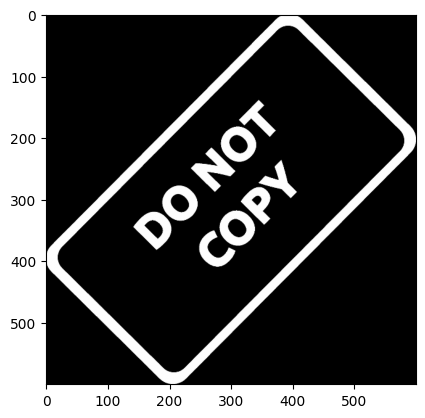

In [ ]:
plt.imshow(mask_inv,cmap='gray')

In [ ]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

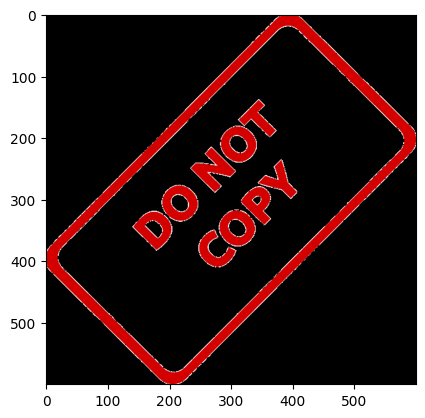

In [ ]:
plt.imshow(fg)

In [ ]:
fg.shape

(600, 600, 3)

### Get ROI and blend in the mask with the ROI

In [ ]:
final_roi = cv2.bitwise_or(roi,fg)

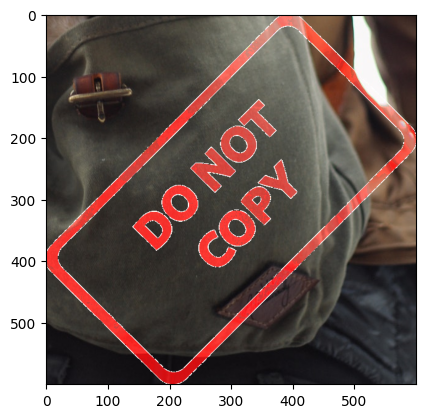

In [ ]:
plt.imshow(final_roi)

### Now add in the rest of the image

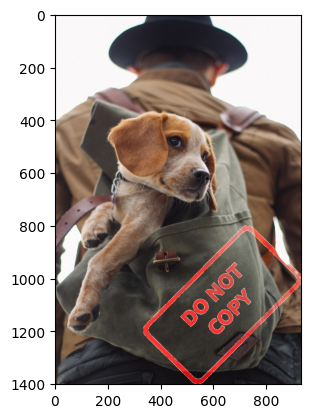

In [ ]:
large_img = img1
small_img = final_roi
# large_img
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img
# plot large_img
plt.imshow(large_img)

In [ ]:
# Save this image in your PC and upload it with your notebook to the Moodle Page
cv2.imwrite('final_image.png', cv2.cvtColor(large_img, cv2.COLOR_RGB2BGR))
# Thank you

True

### Great Work!

Check out these documentation examples and links for more help for these kinds of tasks (which can be really tricky!)

1. https://stackoverflow.com/questions/10469235/opencv-apply-mask-to-a-color-image/38493075
2. https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv
3. https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html

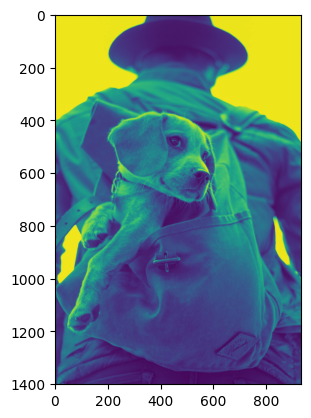

In [ ]:
#pay attention, if your image is not a RGB image, cv.coclor_BGR2GRAY will not work correctely
import cv2 as cv
img1 = cv.imread('dog_backpack.png')
#im_color = cv.imread("lena.png", cv.IMREAD_COLOR)
im_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
plt.imshow(im_gray)


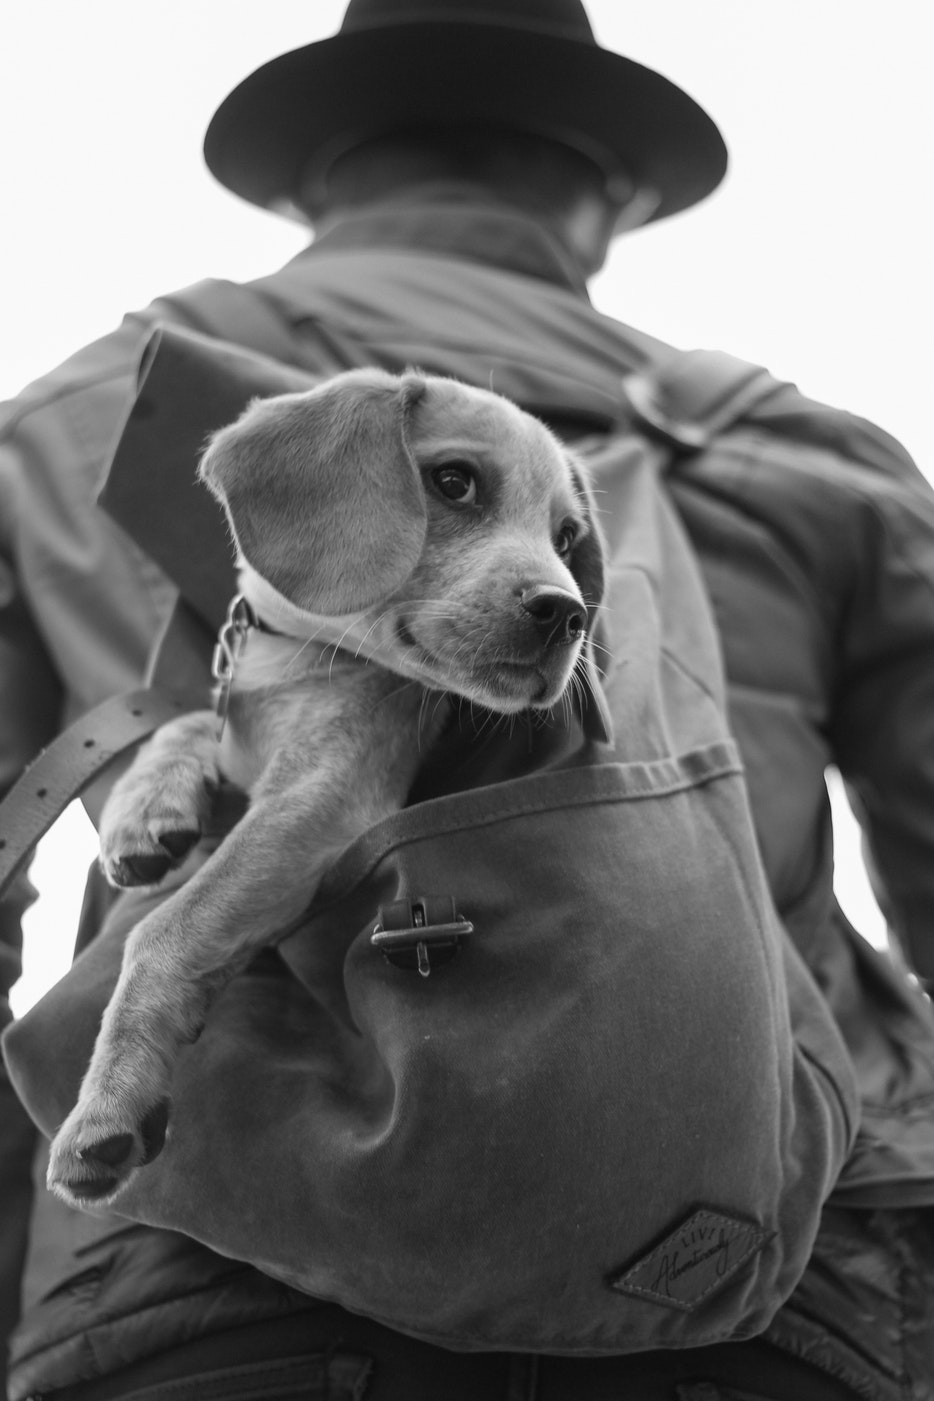

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Load the image
img1 = cv2.imread("dog_backpack.png")

# Convert to grayscale if the image has 3 channels
if len(img1.shape) == 3 and img1.shape[2] == 3:
    img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    cv2_imshow(img_gray)  # Use cv2_imshow instead of cv2.imshow
else:
    print("Image is not in BGR format.")